# Soft Computing

## Cvičení 8 - Fuzzy množiny

Termín fuzzy odkazuje na objekty nebo jevy, které jsou nejisté nebo vágní ve své hodnotě. Například pokud se někdo zeptá, zda je vám teplo, nemusí být vždy odpověď zcela jasně ano (pravda, true, 1) nebo zcela jasně ne (nepravda, false, 0), ale může to být hodnota někde mezi. Nad těmito fuzzy objekty byla vybudována celá užitečná teorie pro kybernetiku a strojové učení, která se nazývá fuzzy logika (neurčitá/vágní logika). Základní matematickou strukturou je fuzzy množina.

Člověk v každodenním životě neuvažuje nad hodnotami striktně binárně, proto cílem fuzzy logiky je emulovat lidské přemýšlení. Fuzzy množiny umožňují provádět fuzzy řízení (fuzzy controlling) nepřesným, ale výpočetně nenáročným a rychlým způsobem, které lze připodobnit k deduktivnímu uvažování člověka. Často ani jiná možnost není než fuzzy řízení využít, pokud máme k dispozici pouze vágní data.

Systémy, které využívají fuzzy logiku se nazývají fuzzy systémy. Jejich typická architektura se skládá z následujících komponent:
1. **Rule base** = sada pravidel typu IF-THEN, kterými se řídí rozhodovací proces a vytváří ho doménoví experti
2. **Fuzzifier** = komponenta pro převod vstupů (především ze senzorů) do fuzzy množiny pomocí funkce příslušnosti
3. **Interference Engine** = rozhoduje o tom, jaké z pravidel se má na základě stupně příslušnosti spustit z kódové báze
4. **Defuzzifier** = komponenta pro převod fuzzy množin do konkrétní hodnoty

Fuzzifikace vstupních hodnot (universum diskurzu) se provádí funkce příslušnosti (membership function). Nejvyužívanější funkce příslušnosti jsou:
1. trojúhelníková
2. lichoběžníková
3. gaussovská
4. singleton

Využití fuzzy logiky je převážně v následujících oblastech:
1. automotive systémy - ovládání dopravy, ovládání rychlosti
2. expertní systémy - systémy pro podporu rozhodování v podniku nebo v lékařství
3. řízení chemických systému - přidávání látek do vzorku, zvyšování teploty
4. zpracování přirozeného jazyka - rychlé vyhledávání ve velké databázi
5. neuro-fuzzy - urychlení učení neuronové sítě agregací dat

### 8.1 Fuzzy množiny

Fuzzy množiny jsou základní struktury pro fuzzy řízení. Oproti klasickým množinám mají fuzzy množiny tzv. stupeň příslušnosti/pravdivost (degree of membership, truth) k hodnotám. 

#### Cvičení

Vytvořte váš vlastní model fuzzy množiny a proveďte operaci sjednocení nad dvěmi fuzzy množinami

#### Řešení

In [14]:
#fuzzy množiny můžeme reprezentovat slovníkem
jana = dict()
milan = dict()
pocasi = dict()
 
#máme 2 fuzzy množiny nad universem diskurzu U = {zima, teplo, peklo} se stupněmi příslušnosti
univerzum_diskurzu = ["zima", "teplo", "peklo"]
jana = {"zima": 0.2, "teplo": 0.3, "peklo": 0.8}
milan = {"zima": 0.4, "teplo": 0.5, "peklo": 0.3}

#ukázka sjednocení 2 fuzzy množin
#stupen_prislusnosti(Y)= max(stupen_prislusnosti(A), stupen_prislusnosti(B)) pro kazdou hodnotu
for hodnota in univerzum_diskurzu:
    jana_stupen_prislustnosti = jana[hodnota]
    milan_stupen_prislusnosti = milan[hodnota]
 
    if jana_stupen_prislustnosti > milan_stupen_prislusnosti:
        pocasi[hodnota] = jana_stupen_prislustnosti
    else:
        pocasi[hodnota] = milan_stupen_prislusnosti
         
print(pocasi)

{'zima': 0.4, 'teplo': 0.5, 'peklo': 0.8}


#### Cvičení
Napište kód, který provede sjednodcení nad libovolným počtem fuzzy množin.

#### Řešení

In [15]:
jana = dict()
milan = dict()
petra = dict()
pocasi = dict()
 
univerzum_diskurzu = ["zima", "teplo", "peklo"]
jana = {"zima": 0.2, "teplo": 0.3, "peklo": 0.8}
milan = {"zima": 0.4, "teplo": 0.5, "peklo": 0.3}
petra = {"zima": 0.3, "teplo": 0.6, "peklo": 0.5}
mnoziny = [jana, milan, petra]

for hodnota in univerzum_diskurzu:
    pocasi[hodnota] = max([mnozina[hodnota] for mnozina in mnoziny])
         
print(pocasi)

{'zima': 0.4, 'teplo': 0.6, 'peklo': 0.8}


### 8.2 Fuzzy operace

#### Cvičení

V předchozím kódu jste viděli provedení fuzzy operace sjednocení nad dvěmi fuzzy množinami. Napište funkce, které provedou následující fuzzy operace podle jejich definic z přednášek:
1. sjednocení (už hotové)
2. průnik
3. rozdíl
4. doplněk

In [ ]:
def fuzzy_sjednoceni(A, B):
    ...

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_sjednoceni(A, B))

In [ ]:
def fuzzy_prunik(A, B):
    ...

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_prunik(A, B))

In [ ]:
def fuzzy_rozdil(A, B):
    ...

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_rozdil(A, B))

In [ ]:
def fuzzy_doplnek(A):
    ...

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
print(fuzzy_doplnek(A))

#### Řešení

In [4]:
def fuzzy_sjednoceni(A, B):
    Y = dict()
    for A_key, B_key in zip(A, B):
        A_value = A[A_key]
        B_value = B[B_key]
    
        if A_value > B_value:
            Y[A_key] = A_value
        else:
            Y[B_key] = B_value
    return Y

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_sjednoceni(A, B))

{'a': 0.9, 'b': 0.9, 'c': 0.6, 'd': 0.6}


In [ ]:
def fuzzy_sjednoceni(A, B):
    Y = dict()
    for A_key, B_key in zip(A, B):
        A_value = A[A_key]
        B_value = B[B_key]
    
        if A_value > B_value:
            Y[A_key] = A_value
        else:
            Y[B_key] = B_value
    return Y

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_sjednoceni(A, B))

In [6]:
def fuzzy_prunik(A, B):
    Y = dict()
    for A_key, B_key in zip(A, B):
        A_value = A[A_key]
        B_value = B[B_key]
    
        if A_value < B_value:
            Y[A_key] = A_value
        else:
            Y[B_key] = B_value
    return Y

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_prunik(A, B))

{'a': 0.2, 'b': 0.3, 'c': 0.4, 'd': 0.5}


In [8]:
def fuzzy_rozdil(A, B):
    Y = dict()
    for A_key, B_key in zip(A, B):
        A_value = A[A_key]
        B_value = B[B_key]
        B_value = 1 - B_value
        
        if A_value < B_value:
            Y[A_key] = A_value
        else:
            Y[B_key] = B_value
    return Y

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}
print(fuzzy_rozdil(A, B))

{'a': 0.09999999999999998, 'b': 0.09999999999999998, 'c': 0.6, 'd': 0.5}


In [7]:
def fuzzy_doplnek(A):
    Y = dict()
    for A_key in A:
        Y[A_key]= 1-A[A_key]
    return Y

A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
print(fuzzy_doplnek(A))

{'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}


### 8.3 Fuzzifikace

Fuzzifikace slouží k získání fuzzy množin z číselných vstupů pro provádění fuzzy operací a fuzzy rozhodování interferenčním systémem o aplikaci pravidla z báze pravidel.

#### Cvičení

Naprogramujte následující členské funkce (předpis naleznete zde na https://codecrucks.com/what-is-fuzzy-membership-function-complete-guide/) a fuzzifikujte množinu vstupních dat:
1. Singleton
2. Triangular
3. Trapezoidal
4. Gaussian
5. Sigmoid



#### Řešení

In [17]:
import numpy as np
import matplotlib.pyplot as plt

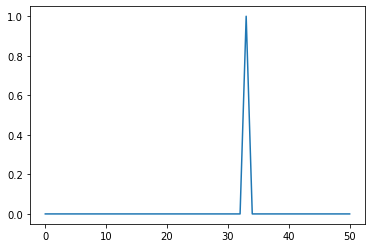

In [26]:
def singleton(x, c):
    return [1 if xi == c else 0 for xi in x]

roky = np.linspace(start=0, stop=50, num=51, endpoint=True)
clovek_v_kristovych_letech = singleton(x=roky, c=33)

plt.plot(roky, clovek_v_kristovych_letech)


In [ ]:
def triangular(x, a, b, c):
    if x < a:
        return 0
    elif a <= x < b:
        return (x-a)/(b-a)
    elif b <= x < c:
        return (c-x)/(c-b)
    else: # x <= c
        return 0

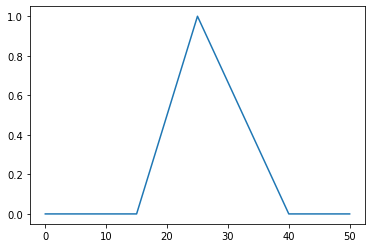

In [31]:
def triangular(x, a, b, c):
    return [max([min([(xi-a)/(b-a),(c-xi)/(c-b)]), 0]) for xi in x]

roky = np.linspace(start=0, stop=50, num=51, endpoint=True)
mlady_clovek = triangular(x=roky, a=15, b = 25, c=40)

plt.plot(roky, mlady_clovek)


In [ ]:
def rectangular(x, a, b, c, d):
    if x < a:
        return 0
    elif a <= x < b:
        return (x-a)/(b-a)
    elif b <= x < c:
        return 1
    elif c <= x < d:
        return (d-x)/(d-c)
    else: # x <= d
        return 0
 

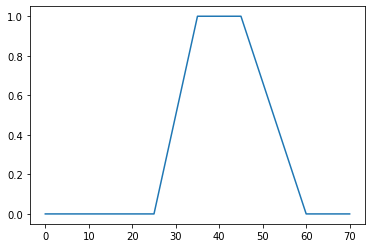

In [33]:
def rectangular(x, a, b, c, d):
    return [max([min([(xi-a)/(b-a),1,(d-xi)/(d-c)]), 0]) for xi in x]

roky = np.linspace(start=0, stop=70, num=71, endpoint=True)
stary_mladenec = rectangular(x=roky, a=25, b = 35, c=45, d=60)

plt.plot(roky, stary_mladenec)


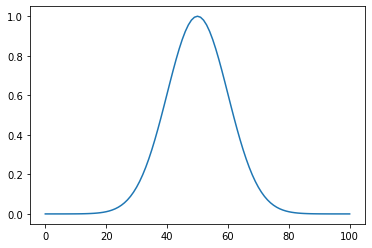

In [35]:
def gaussian(x, mu, sigma):
    return [np.exp(-0.5*((xi-mu)/sigma)**2) for xi in x]

roky = np.linspace(start=0, stop=100, num=101, endpoint=True)
vek_ucitelu_ki = gaussian(x=roky, mu=50, sigma=10)

plt.plot(roky, vek_ucitelu_ki)

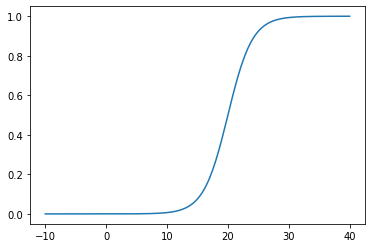

In [64]:
def sigmoid(x, alpha, beta):
    return [1/(1 + np.exp(-alpha*(xi-beta))) for xi in x]

roky = np.linspace(start=-10, stop=40, num=201, endpoint=True)
vedro = sigmoid(x=roky, alpha=0.5, beta=20)

plt.plot(roky, vedro)


#### Cvičení
Upravte vaše operace nad fuzzy množinami, ať jsou schopný přijmout množiny definované členskou funkcí a ujistěte se, že množiny splňují všechny následující vlastnosti (idempotence, transitivita, atd): https://www.tutorialspoint.com/fuzzy_logic/fuzzy_logic_set_theory.htm

#### Řešení

### 8.4 Defuzzifikace

#### Cvičení

Naprogramujte si (na základě předpisu z https://www.tutorialspoint.com/fuzzy_logic/fuzzy_logic_membership_function.htm) následující defuzzifikační metody:
1. Max-membership
2. Centroid
3. Weighted average
4. Mean-Max


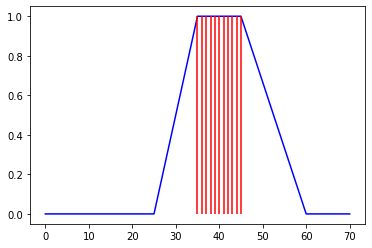

In [70]:
def max_membership(fuzzy_mnozina):
    return max(fuzzy_mnozina)

roky = np.linspace(start=0, stop=70, num=71, endpoint=True)
stary_mladenec = rectangular(x=roky, a=25, b = 35, c=45, d=60)
vysledna_hodnota = np.where(stary_mladenec == max_membership(fuzzy_mnozina = stary_mladenec))

plt.plot(roky, stary_mladenec, "b")
plt.vlines(x=vysledna_hodnota, ymin=0, ymax=1, colors=["r"])

#### Řešení

#### 8.5 Báze pravidel

#### Cvičení

#### Řešení

### 8.6 Inferefenční systémy

https://github.com/amogorkon/fuzzylogic/blob/master/docs/Showcase.ipynb

#### Cvičení

#### Řešení